## UK House Prices and Sales

I have analysed the property market in the UK in the first months of the past five years. I have investigated the following aspects:
1. House Prices,
2. Number of Sales.

This was to analyse the effect of *Black Swans* such as Brexit and COVID19, on the property market – domestic and global effects on the market. 

From plot 1, we can see that COVID19 has had a severe effect on both the house prices and the number of sales in the UK. Remembering the lockdown came in action on March 23rd, we can see a drop in number of sales in April (281) and May (41) – noting this is across the whole UK. One thing to note in the plot is a significant increase in the average house prices in April, followed by a significant decrease in May. This could easily be a selection bias which is skewing the distribution. This will need further investigation: 
1. Transactions as function of location, eg. wealthy areas vs poor areas.
2. Transactions as function of prices, eg. long tail distribution effect. 

From plot 2, we can see which parts of London has been hit the most by COVID19 in terms of number of sales comparing 2019 and 2020. A similar investigation can be carried on other parts of the UK both during the pandemic and during a recovery stage. 
The UK property market is expected to see an interesting evolution in the next few months due to the following reasons: 
1.	After COVID19, most companies are offering flexible working options, most importantly, they are encouraging employees to work from home. This might mean that houses further away from stations may become more attractive to buyers since there is no need to commute. This may mean that houses further away from stations might see an increase both in terms of prices and number of sales. 
2.	UK government has announced a Stamp Duty* Holiday taking effect from July 8th until March 31st 2021. This means you do not pay ST on properties under £500k (previously £125k). This translates into nine out of 10 people buying a main home between now and end of March will pay no SD at all. Given there are 81% of properties for sale on Rightmove** are under £500k and that 84% of all buyers enquire properties under £500k, the new ST holiday will keep the nation going and, with number of unemployment growing, will stop the destabilising falls in the house prices.   

This analysis needs further time for proper investigation and I would like to investigate the following aspects: 
1. How the above will affect the growth/recovery of economy in the UK.
2. Do the above, especially government strategy, help the recovery of the economy in UK. 
3. Given the black swans, such as the recent pandemics, happen more often than we ever think, can we find a pattern in the way economy is affected? And find better strategies to halt a credit crunch and strategies to recover from economic falls? So essentially make this black swan into a white swan. 

\* Stamp duty is a lump-sum tax that anyone buying a property or land costing more than a certain amount must pay

\** Property search app.


In [48]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import datetime as dt
import altair as alt
import geopandas as gpd
import seaborn as sns

sns.set()

In [2]:
################################################# Data
##read data
df_all = pd.read_csv(r'Data\pp-complete.csv',header=None)
#df20 = pd.read_csv(r'Data\pp-2020.csv',header=None)
#df19 = pd.read_csv(r'Data\pp-2019.csv',header=None)
#df18 = pd.read_csv(r'Data\pp-2018.csv',header=None)
#frames = [df20,df19,df18]
#df_all = pd.concat(frames) 
df_sub = df_all.drop(columns=[3,4,5,6,7,8,9,14,15])
names = ['ID','Price','Date','Locality',
         'Town/City','District','County']
numbs = [0,1,2,10,11,12,13]
maps_ = dict(zip(numbs,names))
df_sub.rename(columns=maps_,inplace=True)
df_sub.isnull().sum()
df_sub.set_index('ID',inplace=True)
df_sub.Date = pd.to_datetime(df_sub.Date) 
df_sub['Year'] = df_sub.Date.dt.year
df_sub['Month'] = df_sub.Date.dt.month
################################################# END Data

In [91]:
################################################# Plot 1
df1 = df_sub.groupby(['Year','Month'])['Price'].agg(['mean','count'])
df1.reset_index(inplace=True)
df1.rename(columns={'mean':'Average House Price (£)','count':'# of Sales'},inplace=True)
df2 = df1[(df1.Month<6) & (df1.Year>2015)]
df2 = df2.assign(date=pd.to_datetime(df2[['Year','Month']].assign(day=1)))
df2['Average House Price (£)'] = df2['Average House Price (£)'].round(decimals=-3)
#df2['Average House Price (£)'] = df2['Average House Price (£)'].apply(lambda x: "£{:.0f}k".format((x/1000)))
##Regularisation step to decrease gap between elements
reg_coef = 1e4
df2['# of Sales Regularised'] = (reg_coef+df2['# of Sales'])/reg_coef

##plot interactive 
selection = alt.selection_single(
    name='select',fields=['Year'],on='mouseover'
    )
chart = alt.Chart(df2).mark_point(filled=True).encode(
    alt.X('month(date):N'),
    alt.Y('Average House Price (£)',scale=alt.Scale(zero=False)),
    alt.Size('# of Sales Regularised:Q'),
    alt.OpacityValue(0.8),
    alt.Order('# of Sales:Q', sort='ascending'),
    tooltip = [alt.Tooltip('# of Sales:Q'),
               alt.Tooltip('Average House Price (£):Q'),
               alt.Tooltip('Year:Q')
              ],
    color=alt.condition(selection,'Year:N',alt.value('grey'))
).add_selection(selection).properties(
    width=500,
    height=300
)
chart.save('chart_15072020.html')
chart.save('chart_15072020.json')
################################################# END Plot 1

In [92]:
chart

alt.Chart(...)

if the above plot not showing please see: paniezpaykari.github.io

In [95]:
################################################# Plot 2
##map data
map_ = r'Data\London_Borough_Excluding_MHW.shp'
df_map = gpd.read_file(map_)
cols_to_drop = ['GSS_CODE','HECTARES',
                'NONLD_AREA','ONS_INNER',
                'SUB_2009','SUB_2006']
df_map.drop(columns=cols_to_drop,inplace=True)
df_map['NAME'] = df_map['NAME'].str.upper()
#df_map.head(1)
#df_map.plot()

##house price data
cols_to_drop = ['Locality','Town/City','County']
df_lon = df_sub[df_sub.County=='GREATER LONDON']
df_lon.drop(columns=cols_to_drop,inplace=True)
df_lon = df_lon[(df_lon.Month<6) & (df_lon.Year>2018)]
df_grp = df_lon.groupby(['Year','District'])['Date'].count()
df_grp = pd.DataFrame(df_grp).reset_index()
df_grp.rename(columns={'Date':'Count'},inplace=True)
df_piv = df_grp.pivot(index='District',columns='Year',values='Count')
df_piv['Drop in # of Sales'] = df_piv[2019]-df_piv[2020]
df_piv.drop(columns=[2019,2020],inplace=True)

df_mer = df_map.merge(df_piv,left_on='NAME',right_on='District')
df_mer['coords'] = df_mer['geometry'].apply(lambda x: x.representative_point().coords[:])
df_mer['coords'] = [coords[0] for coords in df_mer['coords']]
noise = np.random.uniform(0,1000,32)
df_mer['coords_jitter'] = df_mer['coords']
names = ['HAVERING',
         'LEWISHAM',
         'WALTHAM FOREST', 
         'REDBRIDGE',
         'KENSINGTON AND CHELSEA','TOWER HAMLETS',
         'ISLINGTON',
         'CITY OF LONDON']
#for i in names:
#    ind = df_mer[df_mer.NAME==i].index
#    print('1:',df_mer['coords_jitter'][ind])
#    df_mer['coords_jitter'][ind] = df_mer['coords'][ind].values[0][0] + noise[ind]
#    print('2:',df_mer['coords_jitter'][ind])

##map plot
col_ = 'Drop in # of Sales'
min_ = 1300
max_ = 60

fig,ax = plt.subplots(1,figsize=(10,6))
df_mer.plot(column=col_,cmap='Greens',
            linewidth=0.5,ax=ax,edgecolor='0.5')
for idx,row in df_mer.iterrows():
    plt.annotate(s=row['NAME'],
                 xy=row['coords_jitter'],
                 horizontalalignment='center',fontsize=8)
ax.axis('off')
ax.set_title('# of Sales hit by COVID19 in London', 
fontdict={'fontsize':'20','fontweight':'2'})
ax.annotate('Source: London Datastore',
xy=(0.1, .08),xycoords='figure fraction', 
horizontalalignment='left', verticalalignment='top')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens',
     norm=plt.Normalize(vmin=min_,vmax=max_))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('map_London_15072020.png',dpi=100)
################################################# END Plot 2

DriverError: Unable to open Data\London_Borough_Excluding_MHW.shx or Data\London_Borough_Excluding_MHW.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [99]:
df1 = df_sub.groupby(['Year','Month'])['Price'].agg(['mean','count'])
df1.reset_index(inplace=True)
df1.rename(columns={'mean':'Average House Price (£)','count':'# of Sales'},inplace=True)
df2 = df1[(df1.Year>=2012)]
df2 = df2.assign(date=pd.to_datetime(df2[['Year','Month']].assign(day=1)))
df2['Average House Price (£)'] = df2['Average House Price (£)'].round(decimals=-3)

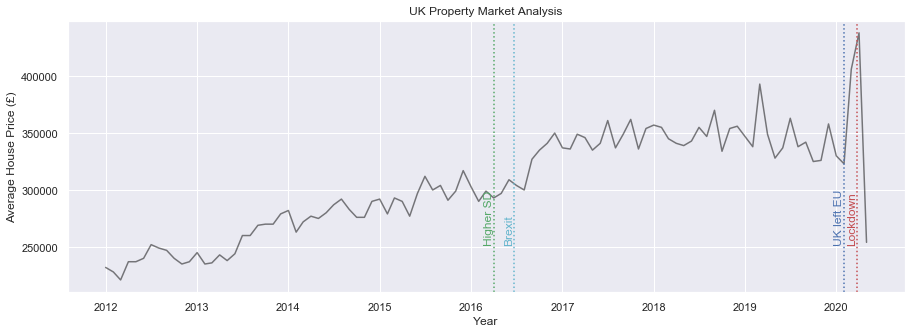

In [100]:
################################################# Plot 3
plt.figure(figsize=(15,5))
plt.plot(df2['date'],df2['Average House Price (£)'],c='black',alpha=.5)
plt.xlabel('Year');plt.ylabel('Average House Price (£)');plt.title('UK Property Market Analysis')

y_pos = 253000
delta = -40

x_pos = dt.datetime(2016,4,1)
plt.axvline(x_pos,ls=':',c='g')
plt.annotate('Higher SD',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='g',fontsize=12)

x_pos = dt.datetime(2016,6,23)
plt.axvline(x_pos,ls=':',c='c')
plt.annotate('Brexit',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='c',fontsize=12)

x_pos = dt.datetime(2020,1,31)
plt.axvline(x_pos,ls=':',c='b')
plt.annotate('UK left EU',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='b',fontsize=12)

x_pos = dt.datetime(2020,3,23)
plt.axvline(x_pos,ls=':',c='r')
plt.annotate('Lockdown',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='r',fontsize=12)

plt.savefig('AverageHousePrice.pdf')
################################################# END Plot 3

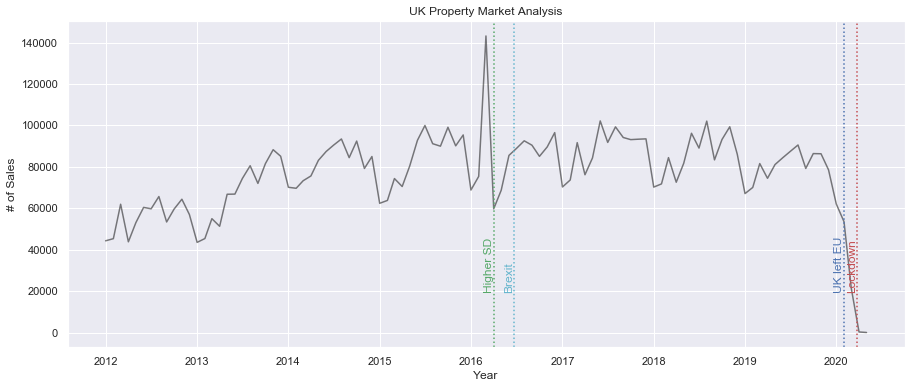

In [101]:
################################################# Plot 4
plt.figure(figsize=(15,6))
plt.plot(df2['date'],df2['# of Sales'],c='black',alpha=.5)
plt.xlabel('Year');plt.ylabel('# of Sales');plt.title('UK Property Market Analysis')

y_pos = 20000
delta = -40

x_pos = dt.datetime(2016,4,1)
plt.axvline(x_pos,ls=':',c='g')
plt.annotate('Higher SD',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='g',fontsize=12)

x_pos = dt.datetime(2016,6,23)
plt.axvline(x_pos,ls=':',c='c')
plt.annotate('Brexit',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='c',fontsize=12)

x_pos = dt.datetime(2020,1,31)
plt.axvline(x_pos,ls=':',c='b')
plt.annotate('UK left EU',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='b',fontsize=12)

x_pos = dt.datetime(2020,3,23)
plt.axvline(x_pos,ls=':',c='r')
plt.annotate('Lockdown',xy=(x_pos+td.timedelta(days=delta),y_pos),xycoords='data',rotation=90,c='r',fontsize=12)

plt.savefig('NumberOfSales.pdf')
################################################# Plot 4